In [1]:
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install skimage

You should consider upgrading via the 'c:\users\prash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\prash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\prash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\prash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached skimage-0.0.tar.gz (757 bytes)


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\prash\appdata\local\programs\python\python39\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\prash\\AppData\\Local\\Temp\\pip-install-2ng_3_ry\\skimage_17ba493a449540e694228546d4e1d306\\setup.py'"'"'; __file__='"'"'C:\\Users\\prash\\AppData\\Local\\Temp\\pip-install-2ng_3_ry\\skimage_17ba493a449540e694228546d4e1d306\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\prash\AppData\Local\Temp\pip-pip-egg-info-4l3ffcnr'
         cwd: C:\Users\prash\AppData\Local\Temp\pip-install-2ng_3_ry\skimage_17ba493a449540e694228546d4e1d306\
    Complete output (3 lines):
    
    *** Please install the `scikit-image` package (instead of `s

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as plt2
import os
from os import listdir
from os.path import isfile, join
from skimage import io
import random
#import zipfile
#from numba import jit

## <font color=red>1. </font>Cargar las imágenes y los datos tabulares (CSV) 

In [3]:
# Original images directories
#dir_train_images = "../input/siim-isic-melanoma-classification/train/"
#train_images = [f for f in listdir(dir_train_images) if isfile(join(dir_train_images, f))]
#dir_test_images = "../input/siim-isic-melanoma-classification/test/"
#test_images = [f for f in listdir(dir_test_images) if isfile(join(dir_test_images, f))]

# Resized images directories
dir_resized_train_images = "data/train_jpg224x224/"
train_resized_images = [f for f in listdir(dir_resized_train_images) if isfile(join(dir_resized_train_images, f))]
dir_resized_test_images = "data/test_jpg224x224/"
test_resized_images = [f for f in listdir(dir_resized_test_images) if isfile(join(dir_resized_test_images, f))]

In [4]:
train_df = pd.read_csv('data/siim-isic-melanoma-classification/train.csv')
test_df = pd.read_csv('data/siim-isic-melanoma-classification/test.csv')

In [5]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
def append_ext(filename):
    return filename + ".jpg"

train_df["image_name"] = train_df["image_name"].apply(append_ext)
test_df["image_name"] = test_df["image_name"].apply(append_ext)

In [7]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011.jpg,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719.jpg,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212.jpg,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279.jpg,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268.jpg,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [8]:
t = train_df[train_df["target"] == 1]

In [9]:
t.to_csv('out.csv', index=False)

Use of flow_from_dataframe : https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

## <font color=red>2. </font>Exploración de datos

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [11]:
patient_id_count = train_df['patient_id'].count()
patient_id_unique_count = train_df['patient_id'].value_counts().shape[0]
print("Número total de id de pacientes son:", patient_id_count, " los cuales los id únicos son:", patient_id_unique_count)

Número total de id de pacientes son: 33126  los cuales los id únicos son: 2056


Vemos que hay pacientes con más de una imagen. Por lo que más adelante, para los pacientes con múltiples registros, habrá que asegurarse de que no aparezcan en los conjuntos de entrenamiento y prueba para evitar *Data Leakage*. 

<AxesSubplot:>

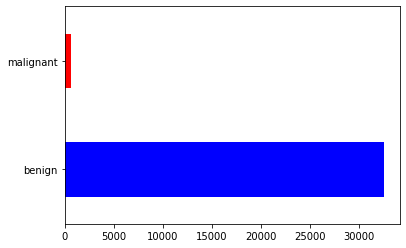

In [12]:
train_df.benign_malignant.value_counts().plot.barh(color=['b', 'r'])

In [13]:
train_df.benign_malignant.value_counts().rename_axis('Tipo').reset_index(name='Total de muestras')

,Tipo,Total de muestras
0,benign,32542
1,malignant,584


Al representar el número de muestras de cada tipo, observamos que hay más registros benignos que de malignos. Esto es normal ya que en el mundo real la frecuencia de tumores existe más tumores benignos que malignos. Por lo que produce un desequilibrio del conjunto de datos.

A continuación, extraemos los datos faltantes del conjunto de datos de entrenamiento y de test.

In [14]:
def missing_values(df):
    missing_values = df.isnull().sum()
    percentage_missing_values = 100 * df.isnull().sum() / len(df)
    
    missing_values_table = pd.concat([missing_values, percentage_missing_values], axis=1)
    missing_values_table.columns = ['Missing values', '% of total missing values']
    missing_values_table = missing_values_table.sort_values(by=['Missing values'], ascending=False)
    
    return missing_values_table

In [15]:
missing_values(train_df)

,Missing values,% of total missing values
anatom_site_general_challenge,527,1.590895
age_approx,68,0.205277
sex,65,0.196220
image_name,0,0.000000
patient_id,0,0.000000
diagnosis,0,0.000000
benign_malignant,0,0.000000
target,0,0.000000


In [16]:
missing_values(test_df)

,Missing values,% of total missing values
anatom_site_general_challenge,351,3.196139
image_name,0,0.000000
patient_id,0,0.000000
sex,0,0.000000
age_approx,0,0.000000


Se opta por eliminar los registros faltantes ya que son minúsculos:

In [17]:
train_df = train_df.dropna()
missing_values(train_df)

,Missing values,% of total missing values
image_name,0,0.0
patient_id,0,0.0
sex,0,0.0
age_approx,0,0.0
anatom_site_general_challenge,0,0.0
diagnosis,0,0.0
benign_malignant,0,0.0
target,0,0.0


In [68]:
train_df.benign_malignant.value_counts().rename_axis('Tipo').reset_index(name='Total de muestras')

,Tipo,Total de muestras
0,benign,31956
1,malignant,575


Visualizamos de qué parte del cuerpo provienen la mayoría de las imágenes del conjunto de entrenamiento:

<AxesSubplot:>

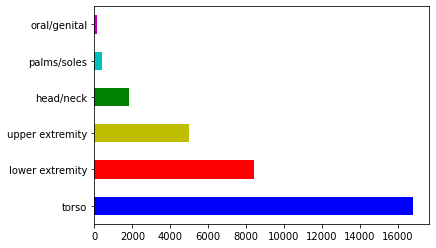

In [18]:
train_df.anatom_site_general_challenge.value_counts().plot.barh(color=['b', 'r', 'y', 'g', 'c', 'm'])

Vemos que hay un desequilibrio en las partes del cuerpo en el cual se han extraído las imágenes, siendo el más común el torso.

<AxesSubplot:>

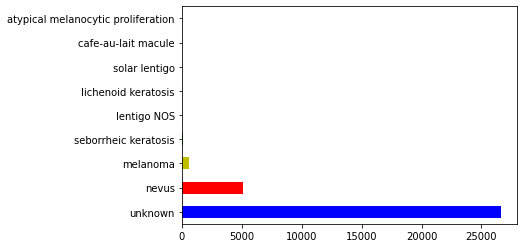

In [19]:
train_df.diagnosis.value_counts().plot.barh(color=['b', 'r', 'y', 'g', 'c', 'm'])

<AxesSubplot:>

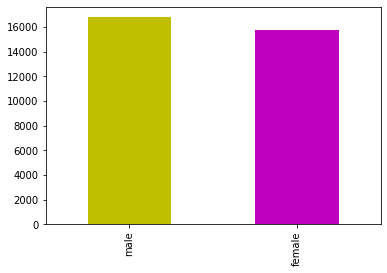

In [20]:
train_df.sex.value_counts().plot.bar(color=['y', 'm'])

La distribución del género está equilibrada.

<AxesSubplot:>

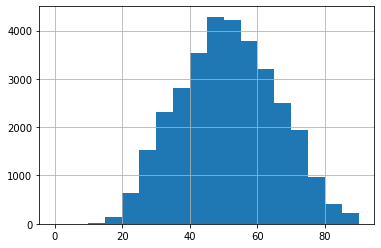

In [21]:
train_df.age_approx.hist(bins=len(train_df['age_approx'].unique()))

Podemos ver que las personas de mediana edad tienen más probabilidades de contraer melanoma (y cáncer en general, como han demostrado los estudios).

In [22]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (32531, 8)
Test shape: (10982, 5)


## <font color=red>3.1 </font>Preprocesamiento de datos con JPEG

Crea un directorio 'dataset/train' y subdirectorios '0'(benigno) y '1'(maligno)

In [74]:
os.makedirs("dataset/train")
file_path = "dataset/train/"
all_target = list(set(train_df["target"]))

for x in all_target:
    os.mkdir(file_path + str(x))

In [75]:
dictionary = train_df.set_index("image_name")["target"].to_dict()

In [76]:
import shutil

for x in dictionary:
    # Get image from the original directory
    filename = "data/train_jpg224x224/" + str(x)
    shutil.copy(filename, file_path + str(dictionary[x]))

----------------------------------------

In [21]:
PATH = 'dataset'

In [22]:
train_images_jpeg = os.listdir(f'{PATH}/train_jpg224x224')
test_images_jpeg = os.listdir(f'{PATH}/test_jpg224x224')

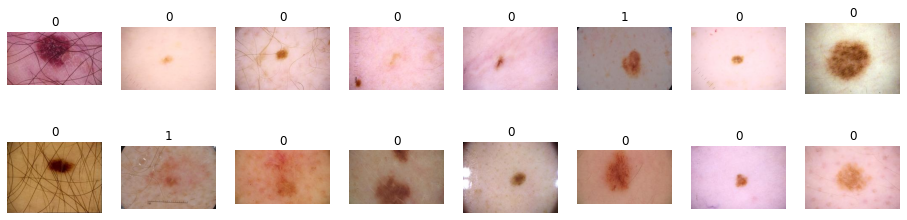

In [23]:
def show_images_jpg():
    row, column = 2, 8
    fig = plt.figure(figsize=(2*column, 2*row))
    for _r in range(row):
        for _c in range(column):
            plt.subplot(row, column, _r*column + _c +1)
            ran = random.randint(0, len(train_images_jpeg)-1)
            name = train_df['image_name'].values[ran]
            img = io.imread(f'{PATH}/train_jpg224x224/{name}')
            plt.imshow(img)
            plt.axis(False)
            label = train_df['target'].values[ran]
            plt.title(label)

    plt.show()

show_images_jpg()

## <font color=red>4. </font>Entrenamiento de modelos

In [24]:
!{sys.executable} -m pip install --user tensorflow

You should consider upgrading via the 'c:\users\prash\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import DenseNet121 # input size 224x224
from keras.layers import Dense, Dropout, Flatten, SpatialDropout2D, SpatialDropout1D, AlphaDropout
from keras.models import Sequential, Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, MaxPool2D
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

PATH = dir_resized_train_images

In [26]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

train_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="data/train_jpg224x224",
    x_col="image_name",
    y_col="target",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(224,224)
)

valid_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="data/train_jpg224x224",
    x_col="image_name",
    y_col="target",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(224,224)
)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="data/test_jpg224x224",
    x_col="image_name",
    y_col=None,
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(224,224)
)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 24399 validated image filenames.
Found 8132 validated image filenames.
Found 10982 validated image filenames.


In [27]:
print("Original train images", len(train_df))
print("Original test images", len(test_df))

Original train images 32531
Original test images 10982


## <font color=red>4.1 </font>Entrenamiento de modelo con sobremuestreo

<center><img src="https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png"></center>
<center>Técnicas de balanceo de datos</center>

In [ ]:
encoder = ResNet50V2 (
    include_top=False,
    input_shape=(None,None,3),
    weights='imagenet',
)
encoder.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = encoder(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.summary()

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC(name="auc")]
)

In [ ]:
history = model.fit_generator(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN, 
                              validation_steps=STEP_SIZE_VALID, 
                              epochs = 10)

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [ ]:
model.evaluate_generator(generator=valid_generator, 
                         steps=STEP_SIZE_TEST)

In [ ]:
test_generator.reset()
predictions = model.predict_generator(generator=test_generator,
                                       steps=STEP_SIZE_TEST,
                                       verbose=1)

In [ ]:
predicted_class_indices=np.argmax(predictions,axis=1)

In [ ]:
predictions = model.predict_generator(generator=train_generator,
                                       steps=STEP_SIZE_TEST,
                                       verbose=1)

In [ ]:
from sklearn import metrics

#confusion_matrix = metrics.confusion_matrix(train_df['target'], np.rint(predictions))

In [ ]:
os.makedirs('models/')
model.save('models/base_model.h5')

## <font color=red>4.2 </font>Entrenamiento de modelo con función de pérdida ponderada

AI for Medicine-Specialization : https://github.com/anmspro/AI-for-Medicine-Specialization

In [ ]:
def compute_class_frequences(labels):
    # Total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [ ]:
labels = train_df["target"].to_numpy()
positive_frequence, negative_frequence = compute_class_frequences(labels)

print("Frecencia de imágenes con cáncer -", positive_frequence)
print("Frecencia de imágenes benignas -", negative_frequence)

In [ ]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        
        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            loss += loss_pos + loss_neg
        
        return loss
    return weighted_loss

In [ ]:
encoder = ResNet50V2 (
    include_top=False,
    input_shape=(None,None,3),
    weights='imagenet',
)
encoder.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = encoder(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

model_weighted_loss = keras.Model(inputs, outputs)
model_weighted_loss.summary()

In [ ]:
model_weighted_loss.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC(name="auc")]
)

In [ ]:
pos_weights = negative_frequence
neg_weights = positive_frequence
pos_contribution = positive_frequence * pos_weights 
neg_contribution = negative_frequence * neg_weights

In [ ]:
# Da nueve veces más peso a los que son malignos
class_weights = {0: 1, 1: 9}

https://stackoverflow.com/questions/44716150/how-can-i-assign-a-class-weight-in-keras-in-a-simple-way/44721883

In [ ]:
history = model_weighted_loss.fit_generator(train_generator, 
                                            class_weight=class_weights, 
                                            validation_data=valid_generator,
                                            steps_per_epoch=STEP_SIZE_TRAIN, 
                                            validation_steps=STEP_SIZE_VALID,
                                            epochs = 10)

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")

plt.show()

In [ ]:
model_weighted_loss.evaluate_generator(generator=valid_generator, 
                                       steps=STEP_SIZE_TEST)

In [ ]:
test_generator.reset()
predictions = model_weighted_loss.predict_generator(generator=test_generator,
                                                    steps=STEP_SIZE_TEST,
                                                    verbose=1)

In [ ]:
os.makedirs('models/')
model.save('models/model_weighted_loss.h5')

## <font color=red>4.3 </font>Entrenamiento del modelo bayesiano

In [27]:
model_mc = ResNet50V2(input_shape=(None,None,3), 
                      include_top=False, 
                      weights='imagenet')

Transfer Learning

In [28]:
for layer in model_mc.layers:
    model_mc.trainable = False

last_layer = model_mc.layers[-1]
print("Forma de la última capa:", last_layer.output_shape)

Forma de la última capa: (None, None, None, 2048)


In [ ]:
model_mc.summary()

In [29]:
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)
model_mc = Model(model_mc.input, x)

In [30]:
model_mc.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [31]:
model_mc.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC(name="auc")]
)

In [32]:
history = model_mc.fit(train_generator, 
                       validation_data=valid_generator,
                       steps_per_epoch=STEP_SIZE_TRAIN, 
                       validation_steps=STEP_SIZE_VALID, 
                       epochs = 10)

Epoch 1/10
762/762 [==============================] - 179s 235ms/step - loss: 0.1817 - auc: 0.6804 - val_loss: 0.0747 - val_auc: 0.8005
Epoch 2/10
762/762 [==============================] - 75s 98ms/step - loss: 0.0847 - auc: 0.7847 - val_loss: 0.0793 - val_auc: 0.7888
Epoch 3/10
762/762 [==============================] - 76s 99ms/step - loss: 0.0778 - auc: 0.8161 - val_loss: 0.0848 - val_auc: 0.7723
Epoch 4/10
762/762 [==============================] - 76s 100ms/step - loss: 0.0757 - auc: 0.8284 - val_loss: 0.0758 - val_auc: 0.8174
Epoch 5/10
762/762 [==============================] - 76s 100ms/step - loss: 0.0701 - auc: 0.8644 - val_loss: 0.0813 - val_auc: 0.8204
Epoch 6/10
762/762 [==============================] - 75s 98ms/step - loss: 0.0660 - auc: 0.8760 - val_loss: 0.0786 - val_auc: 0.7931
Epoch 7/10
762/762 [==============================] - 74s 97ms/step - loss: 0.0660 - auc: 0.8802 - val_loss: 0.0782 - val_auc: 0.7992
Epoch 8/10
762/762 [==============================] - 75s 

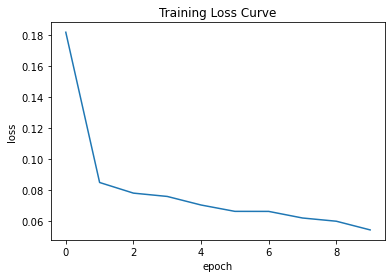

In [33]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")

plt.show()

Fine Tuning

In [ ]:
model_mc_ = ResNet50V2(input_shape=(None,None,3), 
                      include_top=False, 
                      weights='imagenet')

In [34]:
for layer in model_mc_.layers:
    if layer.name == 'block5_conv1'
        break
    model_mc_.trainable = False
    print("Layer ", layer.name, " frozen")

In [ ]:
last_layer = model_mc_.layers[-1].output
x = GlobalMaxPooling2D()(last_layer)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = GlobalMaxPooling2D()(last_layer.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)
model_mc_ = Model(model_mc.input, x)

In [ ]:
#@jit(nopython=True, parallel=True)
def predict_proba(X, model, num_samples):
    preds = [model(X, training=True) for _ in range(num_samples)]
    return np.hstack(preds)

#@jit(nopython=True, parallel=True)
def predict_class(X, model, num_samples):
    proba_preds = predict_proba(X, model, num_samples)
    return pred_dist.mean(axis=1)

In [ ]:
y_pred_proba = predict_proba(train_generator, model_mc, 50)

softmax_output = np.round(model_weighted_loss.predict(train_generator[1:2]), 3)
mc_pred_proba = np.round(y_pred_proba[1], 3)

#print(mc_pred_proba)
print(softmax_output, mc_pred_proba)

In [ ]:
model_mc.evaluate(val_generator)

In [ ]:
os.makedirs('models/')
model.save('models/bayesian_model.h5')

### Comparación de predicciones

## <font color=red>5. </font>Preprocesamiento de datos tabulares

In [ ]:
def check_for_leakage(df1, df2, patient_col):    
    df1_patients_unique = set(df1[patient_col].values)
    df2_patients_unique = set(df2[patient_col].values)
    
    patients_in_both_groups = df1_patients_unique.intersection(df2_patients_unique)

    # leakage contains true if there is patient overlap, otherwise false.
    leakage = len(patients_in_both_groups) > 0 # boolean (true if there is at least 1 patient in both groups)
        
    return leakage

check_for_leakage(train, test, 'patient_id')

In [ ]:
train = train.drop(columns=['diagnosis', 'benign_malignant'])
train.head()

In [ ]:
test.head()

## <font color=red>[Aux] </font>Resimensionar imágenes

In [ ]:
os.listdir('../input/siim-isic-melanoma-classification/jpeg')
PATH = '../input/siim-isic-melanoma-classification/jpeg'

In [ ]:
train_images_jpeg = os.listdir(f'{PATH}/train')
test_images_jpeg = os.listdir(f'{PATH}/test')

In [ ]:
def show_images_jpg():
    row, column = 2, 8
    fig = plt.figure(figsize=(2*column, 2*row))
    for _r in range(row):
        for _c in range(column):
            plt.subplot(row, column, _r*column + _c +1)
            ran = random.randint(0, len(train_images_jpeg)-1)
            name = train['image_name'].values[ran]
            img = io.imread(f'{PATH}/train/{name}.jpg')
            plt.imshow(img)
            plt.axis(False)
            label = train['target'].values[ran]
            plt.title(label)

    plt.show()

show_images_jpg()

In [ ]:
from PIL import Image 

name = train['image_name'].values[50]
img = Image.open(f'{PATH}/train-jpg224x224/{name}.jpg')
width, height = img.size
print(f'Width = {width} | Height = {height}')
plt.imshow(img)
plt.axis(False)

plt.show()

In [ ]:
# Scale the image to 224*224 pixel size

img.thumbnail((224, 224), Image.ANTIALIAS)
width, height = img.size
print(f'Width = {width} | Height = {height}')
plt.imshow(img)
plt.axis(False)

plt.show()

In [ ]:
def resize_images_jpg(df, file, x, y):
    dir_images = '../working/' + file + '/jpg' + str(x) + 'x' + str(y) 
    try:
        os.mkdir('../working/' + file)
        print("Directory", file, "created") 
    except FileExistsError:
        print("Directory", file, "already exists")
    
    try:
        os.mkdir('../working/' + file + '/jpg' + str(x) + 'x' + str(y))
        print("Directory /jpg" + str(x) + "x" + str(y) + " created")
        print("Resizing images...")
    except FileExistsError:
        print("Directory of images", x, "x", y, "already exists")
        return
    
    
    total_images = len(df['image_name'])
    total_images_resized = 0
    for image in df['image_name'].values:
        # Change path to train o test directory
        img = Image.open(f'{PATH}/train/{image}.jpg')
        img.thumbnail((x, y), Image.ANTIALIAS)
        img.save(f'{dir_images}/{image}.jpg')
        total_images_resized += 1
        percentage_resized = (total_images_resized / total_images) * 100
        print("Images resized & saved", percentage_resized, "%")

    print("Images resized")

def delete_images_jpg(file, x, y):
    try:
        os.system(f'rm -rf ../working/{file}/jpg{x}x{y}')
        print(f'Directory {file}/jpg{x}x{y} deleted')
    except:
        print("Could not delete directory")

#delete_images_jpg("train_resized", 224, 224)
#delete_images_jpg("test_resized", 224, 224)
#images_train_jpg_224x224 = resize_images_jpg(train, "train_resized", 224, 224)
#images_test_jpg_224x224 = resize_images_jpg(test, "test_resized", 224, 224)

In [ ]:
import shutil

shutil.make_archive('train_jpg224x224', 'zip', '../working/train_resized/jpg224x224')

In [ ]:
print("Total original images", len(train['image_name']))
print("Total train resized images", len(os.listdir('../working/train_resized/jpg224x224')))
print("Total test original images", len(test['image_name']))
print("Total test resized images", len(os.listdir('../working/test_resized/jpg224x224')))

In [ ]:
BATCH_SIZE = 64
AUTO = tf.data.experimental.AUTOTUNE

def decode(filename, label):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, size=(224,224), preserve_aspect_ratio=True)
    return img, label

def load_ds(df):
    options = tf.data.Options()
    options.experimental_deterministic = False
    # Image name and its label
    imgs, labels = df["image_name"].values, df["target"].values
    # Create full path of images 
    imgs = [f'{PATH}/{name}.jpg' for name in imgs]
    ds = tf.data.Dataset.from_tensor_slices((imgs, labels))
    ds = ds.with_options(options)
    # Transform paths to images
    ds = ds.map(decode, num_parallel_calls=AUTO)
    #ds = ds.cache() # cache can be used if images are small
    ds = ds.shuffle(2048)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTO)
    return ds